In [172]:
#### NOTES ####

# 12/22/18 - Combined data from multiple years into one df
# 12/22/18 - Research on how to make histograms for each gender bigger
# 12/22/18 - Research on warning for deprecated 'normed' kwarg in sns.distplot (matplotlib)
# 12/22/18 - Used aspect arg in FacetGrid func to increase size of histograms for gender BMI
# 12/22/18 - Removed separate df's created for male and female, since viz args allow for
#             segmenting on a category like gender


In [118]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import workbench as wp

In [119]:
# Reload workbench module so changes are included
_ = importlib.reload(wp)

In [120]:
# Import demographic data (e.g., gender)
# for each participant
filename = "1999-2000/DEMO.XPT"
demo_2000 = pd.read_sas(filename)
demo_2000.shape

(9965, 144)

In [121]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
demo_2000["SEQN"].is_unique

True

In [122]:
# Import body measurement data
filename = "1999-2000/BMX.XPT"
bmx_2000 = pd.read_sas(filename)
bmx_2000.shape

(9282, 38)

In [123]:
# Participant identified in SEQN column
# Confirm dataset has only one entry per participant
bmx_2000["SEQN"].is_unique

True

In [124]:
# Add bmx info to demo info
combined_2000 = demo_2000.merge(bmx_2000, how="left", on="SEQN")
combined_2000.shape

(9965, 181)

In [125]:
# Verify new column count meets expectations
# Should be number of cols in each dataframe minus 1 for shared col (SEQN)
demo_2000.shape[1] + bmx_2000.shape[1] - 1

181

In [126]:
# Repeat steps with data from survey year 2015-2016

In [127]:
filename = "2015-2016/BMX_I.XPT"
bmx_2016 = pd.read_sas(filename)
bmx_2016.shape

(9544, 26)

In [128]:
bmx_2016["SEQN"].is_unique

True

In [129]:
filename = "2015-2016/DEMO_I.XPT"
demo_2016 = pd.read_sas(filename)
demo_2016.shape

(9971, 47)

In [130]:
demo_2016["SEQN"].is_unique

True

In [131]:
combined_2016 = demo_2016.merge(bmx_2016, how="left", on="SEQN")
combined_2016.shape

(9971, 72)

In [137]:
# Combine 2000 and 2016 data sets

In [138]:
# Add column to each data set so we can later
# identify the year
new_col = "Survey Year"
combined_2000[new_col] = "1999-2000"
combined_2016[new_col] = "2015-2016"

In [140]:
# Combine dfs
# Note: In Pandas 0.23, must explicitly pass a sorting 
# argument in order to avoid a warning (default = None)
# Pass True to sort columns by name
data = pd.concat([combined_2000, combined_2016], sort=True)
data.shape

(19936, 213)

In [132]:
# Will review male and female participants separately
# Review gender entries
df = combined_2000
col = "RIAGENDR"

df[col].value_counts(dropna=False)

2.0    5082
1.0    4883
Name: RIAGENDR, dtype: int64

In [141]:
# Create mapping of gender code to more readable value
# Per codebook 1.0 = male and 2.0 = female
gender_map = {1.0: "Male",
             2.0: "Female",
             np.nan: "Missing"}

In [142]:
# Add column with gender code translation
df = data

new_col = col + "_x"
df[new_col] = df[col].map(gender_map)

In [145]:
print("Participant Counts by Gender")
df.groupby([new_col, "Survey Year"]).size()
#df[new_col].value_counts(dropna=False)

Participant Counts by Gender


RIAGENDR_x  Survey Year
Female      1999-2000      5082
            2015-2016      5079
Male        1999-2000      4883
            2015-2016      4892
dtype: int64

In [173]:
# Create viz's and compute summary stats of bmi measurements

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


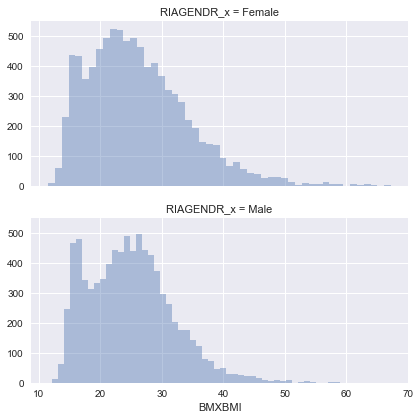

In [170]:
df = data
cat_col = "RIAGENDR" + "_x"
data_col = "BMXBMI"

#sns.set()
#sns.set_context("talk")
g = sns.FacetGrid(df, row=cat_col, aspect=2)
g = g.map(sns.distplot, data_col, kde=False)

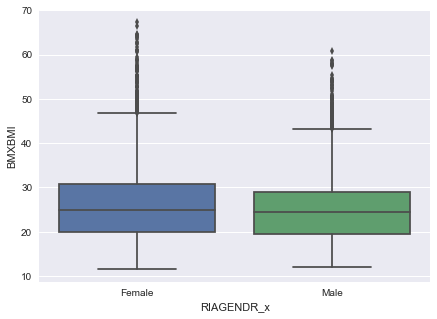

In [171]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=cat_col, y=data_col, data=df)

In [176]:
# Compute summary stats

print("BMI Summary Stats - All Genders")
df[data_col].describe()

BMI Summary Stats - All Genders


count    17218.000000
mean        25.465059
std          7.554681
min         11.490000
25%         19.790000
50%         24.660000
75%         29.800000
max         67.300000
Name: BMXBMI, dtype: float64

In [ ]:
# Segment summary by gender

#print("BMI Summary Stats - All Genders")
